In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#lats_lngs into a list
coordinates = list(lat_lngs)

In [4]:
import citipy as citipy

In [5]:
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

clyde river ca
klyuchi ru
jamestown sh
lebu cl
port alfred za
punta arenas cl
tynda ru
fortuna us
nhulunbuy au
mataura pf
ushibuka jp
laguna br
attawapiskat ca
zhigansk ru
barrow us
mataura pf
puerto ayora ec
mar del plata ar
palabuhanratu id
karamay cn
henties bay na
asosa et
bredasdorp za
zhezkazgan kz
lakki marwat pk
severo-kurilsk ru
jamestown sh
vostok ru
batsfjord no
new norfolk au
nassjo se
cherskiy ru
qaanaaq gl
oktyabrskiy ru
nizhneyansk ru
south venice us
gamba ga
pevek ru
rikitea pf
albany au
taolanaro mg
chokurdakh ru
honiara sb
ribeira grande pt
barrow us
souillac mu
bredasdorp za
beringovskiy ru
lima pe
santa cruz cr
albany au
lompoc us
kegayli uz
vrangel ru
nizwa om
barrow us
hobart au
ola ru
tukrah ly
taolanaro mg
tamandare br
san vicente ph
barentsburg sj
punta arenas cl
ushuaia ar
fukue jp
mataura pf
avarua ck
barrow us
nikolskoye ru
takoradi gh
tasiilaq gl
margate za
sinnamary gf
sitka us
vaini to
ribeira grande pt
fortuna us
fort saint john ca
cape town za
matagami 

belushya guba ru
jamestown sh
belushya guba ru
atuona pf
tocopilla cl
georgetown sh
albany au
katsuura jp
dikson ru
kjollefjord no
souillac mu
chokurdakh ru
cape town za
diu in
kapaa us
ilulissat gl
saskylakh ru
gat ly
upernavik gl
sept-iles ca
illoqqortoormiut gl
qaanaaq gl
grindavik is
ushuaia ar
plover us
nanortalik gl
ascension mx
barra do corda br
rikitea pf
marovoay mg
alta floresta br
airai pw
karangampel id
yuksekova tr
mataura pf
avarua ck
albany au
albany au
punta arenas cl
nikolskoye ru
tuktoyaktuk ca
arrifes pt
oranjestad aw
cape town za
rikitea pf
rio grande br
karratha au
cape town za
salalah om
hobart au
cherskiy ru
ilulissat gl
gweta bw
ushuaia ar
grand gaube mu
lavrentiya ru
port alfred za
busselton au
pisco pe
guerrero negro mx
punta arenas cl
puerto ayora ec
leningradskiy ru
illoqqortoormiut gl
castro cl
marawi sd
port alfred za
thompson ca
barrow us
qaanaaq gl
catumbela ao
sao filipe cv
golden us
vaini to
marzuq ly
narsaq gl
mataura pf
torbay ca
rikitea pf
rio grand

altay cn
saskylakh ru
saldanha za
lebu cl
zhuhai cn
busselton au
cabo san lucas mx
taolanaro mg
ushuaia ar
vaini to
port alfred za
touros br
amderma ru
charters towers au
riyadh sa
atuona pf
taolanaro mg
kudahuvadhoo mv
adrar dz
new norfolk au
albany au
arraial do cabo br
sao gabriel da cachoeira br
hilo us
khomutovka ru
vaini to
yellowknife ca
zachagansk kz
aksarka ru
ust-tsilma ru
ponta do sol pt
wattegama lk
puerto rico co
butaritari ki
acapulco mx
tasiilaq gl
punta arenas cl
tutoia br
punta arenas cl
mnogovershinnyy ru
bredasdorp za
antofagasta cl
slave lake ca
ushuaia ar
samalaeulu ws
kalabagh pk
yellowknife ca
bredasdorp za
vaini to
albany au
qaanaaq gl
kaitangata nz
tasiilaq gl
rikitea pf
ancud cl
ternate id
zlatoustovsk ru
rikitea pf
cidreira br
buin pg
kapaa us
albany au
oktyabrskoye ru
tasiilaq gl
mataura pf
port alfred za
mahebourg mu


In [7]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

607

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
import requests
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5f90c4d5099b220d1a55d65c20c0be


In [34]:
# Create an empty list to hold the weather data.
city_data = []

# Create counters.
record_count = 1
set_count = 1

In [27]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 8 of Set 13 | clyde river
Processing Record 9 of Set 13 | klyuchi
Processing Record 10 of Set 13 | jamestown
Processing Record 11 of Set 13 | lebu
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | tynda
Processing Record 15 of Set 13 | fortuna
Processing Record 16 of Set 13 | nhulunbuy
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | ushibuka
Processing Record 19 of Set 13 | laguna
Processing Record 20 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 13 | zhigansk
Processing Record 22 of Set 13 | barrow
Processing Record 23 of Set 13 | puerto ayora
Processing Record 24 of Set 13 | mar del plata
Processing Record 25 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 26 of Set 13 | karamay
City not found. Skipping...
Processing Record 27 of Set 13 | henties bay
Processing Record 28 of Set 13 | asosa
Processing Record 29 

Processing Record 33 of Set 16 | arraial do cabo
Processing Record 34 of Set 16 | nenjiang
Processing Record 35 of Set 16 | victoria
Processing Record 36 of Set 16 | shinpokh
Processing Record 37 of Set 16 | royan
Processing Record 38 of Set 16 | oyama
Processing Record 39 of Set 16 | praia da vitoria
Processing Record 40 of Set 16 | marfino
Processing Record 41 of Set 16 | nanakuli
Processing Record 42 of Set 16 | krasnoselkup
Processing Record 43 of Set 16 | arman
Processing Record 44 of Set 16 | nong bua
Processing Record 45 of Set 16 | touros
Processing Record 46 of Set 16 | tosno
Processing Record 47 of Set 16 | airai
Processing Record 48 of Set 16 | svetlyy
Processing Record 49 of Set 16 | north bend
Processing Record 50 of Set 16 | nazareno
Processing Record 1 of Set 17 | valparaiso
Processing Record 2 of Set 17 | koslan
Processing Record 3 of Set 17 | barabai
Processing Record 4 of Set 17 | hasaki
Processing Record 5 of Set 17 | san patricio
Processing Record 6 of Set 17 | malw

Processing Record 18 of Set 20 | te anau
Processing Record 19 of Set 20 | iquitos
Processing Record 20 of Set 20 | daru
Processing Record 21 of Set 20 | madang
Processing Record 22 of Set 20 | pangody
Processing Record 23 of Set 20 | san ramon de la nueva oran
Processing Record 24 of Set 20 | bejar
Processing Record 25 of Set 20 | goure
Processing Record 26 of Set 20 | tocopilla
Processing Record 27 of Set 20 | kjollefjord
Processing Record 28 of Set 20 | diu
Processing Record 29 of Set 20 | sept-iles
Processing Record 30 of Set 20 | plover
Processing Record 31 of Set 20 | nanortalik
Processing Record 32 of Set 20 | ascension
Processing Record 33 of Set 20 | barra do corda
Processing Record 34 of Set 20 | marovoay
Processing Record 35 of Set 20 | karangampel
Processing Record 36 of Set 20 | yuksekova
Processing Record 37 of Set 20 | arrifes
Processing Record 38 of Set 20 | oranjestad
Processing Record 39 of Set 20 | rio grande
Processing Record 40 of Set 20 | gweta
Processing Record 41

Processing Record 7 of Set 24 | qiqihar
Processing Record 8 of Set 24 | umm kaddadah
Processing Record 9 of Set 24 | plotnikovo
Processing Record 10 of Set 24 | sisimiut
Processing Record 11 of Set 24 | xinqing
Processing Record 12 of Set 24 | umkomaas
Processing Record 13 of Set 24 | eyl
Processing Record 14 of Set 24 | mutsamudu
City not found. Skipping...
Processing Record 15 of Set 24 | berbera
Processing Record 16 of Set 24 | kalianget
Processing Record 17 of Set 24 | bjorkelangen
Processing Record 18 of Set 24 | samarinda
Processing Record 19 of Set 24 | emba
Processing Record 20 of Set 24 | akdepe
Processing Record 21 of Set 24 | kovdor
Processing Record 22 of Set 24 | bina-etawa
City not found. Skipping...
Processing Record 23 of Set 24 | mackay
Processing Record 24 of Set 24 | along
Processing Record 25 of Set 24 | canaries
Processing Record 26 of Set 24 | petauke
Processing Record 27 of Set 24 | springdale
Processing Record 28 of Set 24 | nishihara
Processing Record 29 of Set

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buin,-33.7333,-70.7500,71.64,38,0,4.36,CL,2021-10-19 01:33:16
1,Clyde River,70.4692,-68.5914,32.41,70,100,9.86,CA,2021-10-19 01:34:59
2,Klyuchi,52.2667,79.1667,38.93,61,24,5.37,RU,2021-10-19 01:30:35
3,Jamestown,42.0970,-79.2353,53.19,71,1,5.01,US,2021-10-19 01:33:37
4,Lebu,-37.6167,-73.6500,51.71,89,3,16.06,CL,2021-10-19 01:35:00
...,...,...,...,...,...,...,...,...,...
554,Mnogovershinnyy,53.9353,139.9242,23.76,67,44,10.02,RU,2021-10-19 01:38:29
555,Slave Lake,55.2834,-114.7690,30.18,86,75,0.00,CA,2021-10-19 01:35:49
556,Kalabagh,32.9650,71.5570,77.13,44,0,0.98,PK,2021-10-19 01:38:30
557,Ternate,0.8000,127.4000,85.32,69,80,2.66,ID,2021-10-19 01:38:30


In [31]:
upd_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[upd_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buin,CL,2021-10-19 01:33:16,-33.7333,-70.7500,71.64,38,0,4.36
1,Clyde River,CA,2021-10-19 01:34:59,70.4692,-68.5914,32.41,70,100,9.86
2,Klyuchi,RU,2021-10-19 01:30:35,52.2667,79.1667,38.93,61,24,5.37
3,Jamestown,US,2021-10-19 01:33:37,42.0970,-79.2353,53.19,71,1,5.01
4,Lebu,CL,2021-10-19 01:35:00,-37.6167,-73.6500,51.71,89,3,16.06
...,...,...,...,...,...,...,...,...,...
554,Mnogovershinnyy,RU,2021-10-19 01:38:29,53.9353,139.9242,23.76,67,44,10.02
555,Slave Lake,CA,2021-10-19 01:35:49,55.2834,-114.7690,30.18,86,75,0.00
556,Kalabagh,PK,2021-10-19 01:38:30,32.9650,71.5570,77.13,44,0,0.98
557,Ternate,ID,2021-10-19 01:38:30,0.8000,127.4000,85.32,69,80,2.66


In [33]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
lats=city_data_df["Lat"]
max_temp=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [41]:
import time
today = time.strftime("%x")
today

'10/19/21'

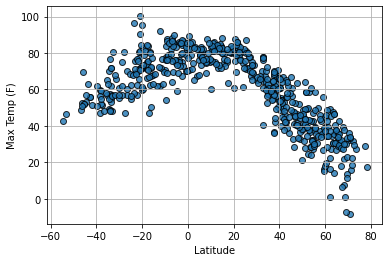

In [59]:
plt.scatter(lats,max_temp,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

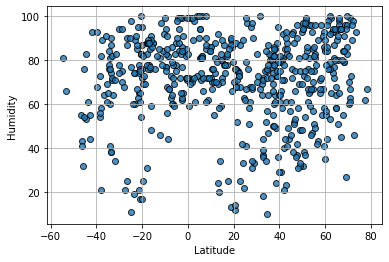

In [60]:
plt.scatter(lats,humidity,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

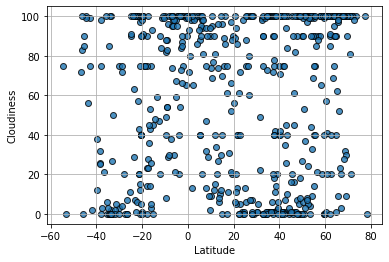

In [61]:
plt.scatter(lats,cloudiness,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

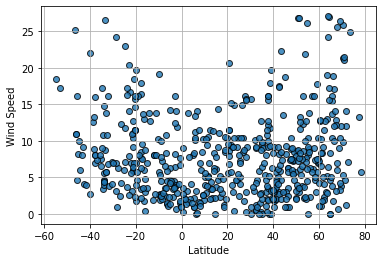

In [62]:
plt.scatter(lats,wind_speed,edgecolor="black",marker="o",label="cities", alpha=0.8, linewidths=1)
#plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()